In [ ]:
"""
任务名称：优化算法torch.optim操作10个方法[参考资料：pytorch官方文档torch.optim
(2)PyTorch_tutorial_0.0.5_余霆嵩文档45~56页]
任务简介：pytorch中的优化算法
详细说明：需要了解常用优化算法的优势和劣势，同时需要了解如何调参，参数中学习率是非常重要的参数，学习率设置不合适会导致震荡或者收敛很慢。
作业名称（详解）：对同一网络进行不同优化算法的测试，比对其效果和收敛速度
作业提交形式：PPT截图或手写拍照,打卡提交.
打卡内容：（可以只是文字提交，或图片提交，或组合都行）
文字  要求最少   字
音频  要求最短   秒
图片  要求最少  10~15 张
"""

In [ ]:
"""
torch.optim:
torch.optim 是一个实现了各种优化算法的库。大部分常用的方法得到支持，并且接口具备足 够的通用性，使得未来能够集成更加复杂的方法。

如何使用optimizer:
为了使用 torch.optim ，你需要构建一个optimizer对象。这个对象能够保持当前参数状态并基 于计算得到的梯度进行参数更新。

构建:
为了构建一个 Optimizer ，你需要给它一个包含了需要优化的参数 的iterable。然后，你可以设置optimizer的参 数选项，比如学习率，权重衰减，等等

例子：
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum=0.9) 
optimizer = optim.Adam([var1, var2], lr = 0.0001) 

为每个参数单独设置选项:
Optimizer 也支持为每个参数单独设置选项。若想这么做，不要直接传入 iterable，而是传入 dict 的iterable。每一个dict都分别定 义了一组参数，并且包含一个 param 键，这个键对应参数的列表。其他的键应该optimizer所接受的其他参数的关键字相匹配，并 且会被用于对这组参数的 优化。

注意：
你仍然能够传递选项作为关键字参数。在未重写这些选项的组中，它们会被用作默认值。当 你只想改动一个参数组的选项，但其他参数组的选项不变时，这是 非常有用的。
例如，当我们想指定每一层的学习率时，这是非常有用的：
optim.SGD([{'params': model.base.parameters()}, {'params': model.classifier.parameters()], 'lr': 1e-3} ,lr=1e-2, momentum=0.9) 
这意味着 model.base 的参数将会使用 1e-2 的学习率， model.classifier 的参数将会使用 1e-3 的学习率，并且 0.9 的momentum将会被用于所 有的参数。

进行单次优化:
所有的optimizer都实现了 step() 方法，这个方法会更新所有的参数。它能按两种方式来使 用：
optimizer.step()
这是大多数optimizer所支持的简化版本。一旦梯度被如 backward() 之类的函数计算好后，我 们就可以调用这个函数。

例子
for input, target in dataset:     
    optimizer.zero_grad()     
    output = model(input)     
    loss = loss_fn(output, target)     
    loss.backward()     
    optimizer.step() 
    optimizer.step(closure)
一些优化算法例如Conjugate Gradient和LBFGS需要重复多次计算函数，因此你需要传入一个 闭包去允许它们重新计算你的模型。这个闭包应当清空梯度， 计算损失，然后返回。

例子：
for input, target in dataset:     
    def closure():        
        optimizer.zero_grad()        
        output = model(input)        
        loss = loss_fn(output, target)         
        loss.backward()         
        return loss     
        optimizer.step(closure) 
        

""""

In [ ]:
"""
算法
class torch.optim.Optimizer(params, defaults) [source]
Base class for all optimizers.
参数：
params (iterable) —— dict 的iterable。指定了什么参数应当被优化。 
defaults —— (dict)：包含了优化选项默认值的字典（一个参数组没有指定的参数选项将会 使用默认值）。

load_state_dict(state_dict) [source]
加载optimizer状态
参数：
state_dict ( dict ) —— optimizer的状态。应当是一个调用 state_dict() 所返回的对象。
state_dict() [source]
以 dict 返回optimizer的状态。
它包含两项。
state - 一个保存了当前优化状态的dict。optimizer的类别不同，state的内容也会不同。 param_groups - 一个包含了全部参数组的dict。
step(closure) [source]
进行单次优化 (参数更新).
参数：
closure ( callable ) – 一个重新评价模型并返回loss的闭包，对于大多数参数来说是可选 的。
zero_grad() [source]
清空所有被优化过的梯度.

"""

In [ ]:
#Adadelta:
#class torch.optim.Adadelta(params, lr=1.0, rho=0.9, eps=1e-06, weight_decay=0) 实现Adadelta算法。

"""
参数：
params (iterable) – 待优化参数的iterable或者是定义了参数组的dict 
rho ( float , 可选) – 用于计算平方梯度的运行平均值的系数（默认：0.9） 
eps ( float , 可选) – 为了增加数值计算的稳定性而加到分母里的项（默认：1e-6） 
lr ( float , 可选) – 在delta被应用到参数更新之前对它缩放的系数（默认：1.0） 
weight_decay ( float , 可选) – 权重衰减（L2惩罚）（默认: 0）
"""

In [ ]:
#Adagrad:

#class torch.optim.Adagrad(params, lr=0.01, lr_decay=0, weight_decay=0),实现Adagrad算法
"""
参数：
params (iterable) – 待优化参数的iterable或者是定义了参数组的dict 
lr ( float , 可选) – 学习率（默认: 1e-2） 
lr_decay ( float , 可选) – 学习率衰减（默认: 0） 
weight_decay ( float , 可选) – 权重衰减（L2惩罚）（默认: 0）
"""

In [ ]:
#Adamax:
#class torch.optim.Adamax(params, lr=0.002, betas=(0.9, 0.999), eps=1e-08, weight_decay=0),实现Adamax算法（Adam的一种基于无穷范数的变种)
"""
参数：
params (iterable) – 待优化参数的iterable或者是定义了参数组的dict 
lr ( float , 可选) – 学习率（默认：2e-3） 
betas (Tuple[ float , float ], 可选) – 用于计算梯度以及梯度平方的运行平均值的系数 
eps ( float , 可选) – 为了增加数值计算的稳定性而加到分母里的项（默认：1e-8）
weight_decay ( float , 可选) – 权重衰减（L2惩罚）（默认: 0）

"""

In [ ]:
#Adam:
#class torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e08, weight_decay=0)[source]实现Adam算法。
"""
参数：
params (iterable) – 待优化参数的iterable或者是定义了参数组的dict 
lr ( float , 可选) – 学习率（默认：1e-3）
betas (Tuple[ float , float ], 可选) – 用于计算梯度以及梯度平方的运行平均值的系数（默 认：0.9，0.999） 
eps ( float , 可选) – 为了增加数值计算的稳定性而加到分母里的项（默认：1e-8）
weight_decay ( float , 可选) – 权重衰减（L2惩罚）（默认: 0）

"""

In [ ]:
#ASGD
#class torch.optim.ASGD(params, lr=0.01, lambd=0.0001, alpha=0.75, t0=1000000.0, weight_decay=0)[source]
#实现平均随机梯度下降算法。

"""
params (iterable) – 待优化参数的iterable或者是定义了参数组的dict 
lr ( float , 可选) – 学习率（默认：1e-2） 
lambd ( float , 可选) – 衰减项（默认：1e-4） 
alpha ( float , 可选) – eta更新的指数（默认：0.75） 
t0 ( float , 可选) – 指明在哪一次开始平均化（默认：1e6） 
weight_decay ( float , 可选) – 权重衰减（L2惩罚）（默认: 0）


"""

In [ ]:
#LBFGS:
#class torch.optim.LBFGS(params, lr=1, max_iter=20, max_eval=None, tolerance_grad=1e-05, tolerance_change=1e-09, history_size=100, line_search_fn=None)[source]
#实现L-BFGS算法。
"""
警告
这个optimizer不支持为每个参数单独设置选项以及不支持参数组（只能有一个）
警告
目前所有的参数不得不都在同一设备上。在将来这会得到改进。
注意
这是一个内存高度密集的optimizer（它要求额外的 param_bytes * (history_size + 1) 个字 节）。
如果它不适应内存，尝试减小history size，或者使用不同的算法。

参数：
lr ( float ) – 学习率（默认：1） 
max_iter ( int ) – 每一步优化的最大迭代次数（默认：20）) 
max_eval ( int ) – 每一步优化的最大函数评价次数（默认：max * 1.25） 
tolerance_grad ( float ) – 一阶最优的终止容忍度（默认：1e-5） 
tolerance_change ( float ) – 在函数值/参数变化量上的终止容忍度（默认：1e-9)
history_size ( int ) – 更新历史的大小（默认：100）
"""


In [ ]:
#RMSprop:
#class torch.optim.RMSprop(params, lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)
#实现RMSprop算法
"""
params (iterable) – 待优化参数的iterable或者是定义了参数组的dict 
lr ( float , 可选) – 学习率（默认：1e-2） 
momentum ( float , 可选) – 动量因子（默认：0） 
alpha ( float , 可选) – 平滑常数（默认：0.99） 
eps ( float , 可选) – 为了增加数值计算的稳定性而加到分母里的项（默认：1e-8） 
centered ( bool , 可选) – 如果为True，计算中心化的RMSProp，并且用它的方差预测值对 梯度进行归一化 
weight_decay ( float , 可选) – 权重衰减（L2惩罚）（默认: 0）

"""

In [ ]:
#Rprop:
#class torch.optim.Rprop(params, lr=0.01, etas=(0.5, 1.2), step_sizes= (1e-06, 50))[source]
#实现弹性反向传播算法
"""

参数：
params (iterable) – 待优化参数的iterable或者是定义了参数组的dict 
lr ( float , 可选) – 学习率（默认：1e-2） 
etas (Tuple[ float , float ], 可选) – 一对（etaminus，etaplis）, 它们分别是乘法的增加和减 小的因子（默认：0.5，1.2） 
step_sizes (Tuple[ float , float ], 可选) – 允许的一对最小和最大的步长（默认：1e-6， 50）

"""

In [ ]:
#SGD:
#class torch.optim.SGD(params, lr=, momentum=0, dampening=0, weight_decay=0, nesterov=False)
#实现随机梯度下降算法（momentum可选）。

"""
params (iterable) – 待优化参数的iterable或者是定义了参数组的dict 
lr ( float ) – 学习率 
momentum ( float , 可选) – 动量因子（默认：0）
weight_decay ( float , 可选) – 权重衰减（L2惩罚）（默认：0） dampening ( float , 可选) – 动量的抑制因子（默认：0） nesterov ( bool , 可选) – 使用Nesterov动量（默认：False

"""


In [ ]:
##以上就是所有优化算法，同学们可以自行测试每个优化算法，只需修改optimizer=optim.优化算法（）

Epoch[200/10000], loss: 6.296507
Epoch[400/10000], loss: 5.613523
Epoch[600/10000], loss: 4.988832
Epoch[800/10000], loss: 4.418646
Epoch[1000/10000], loss: 3.899473
Epoch[1200/10000], loss: 3.428078
Epoch[1400/10000], loss: 3.001463
Epoch[1600/10000], loss: 2.616824
Epoch[1800/10000], loss: 2.271529
Epoch[2000/10000], loss: 1.963093
Epoch[2200/10000], loss: 1.689146
Epoch[2400/10000], loss: 1.447415
Epoch[2600/10000], loss: 1.235701
Epoch[2800/10000], loss: 1.051854
Epoch[3000/10000], loss: 0.893765
Epoch[3200/10000], loss: 0.759331
Epoch[3400/10000], loss: 0.646473
Epoch[3600/10000], loss: 0.553107
Epoch[3800/10000], loss: 0.477152
Epoch[4000/10000], loss: 0.416536
Epoch[4200/10000], loss: 0.369207
Epoch[4400/10000], loss: 0.333155
Epoch[4600/10000], loss: 0.306444
Epoch[4800/10000], loss: 0.287250
Epoch[5000/10000], loss: 0.273898
Epoch[5200/10000], loss: 0.264906
Epoch[5400/10000], loss: 0.259012
Epoch[5600/10000], loss: 0.255197
Epoch[5800/10000], loss: 0.252684
Epoch[6000/10000],

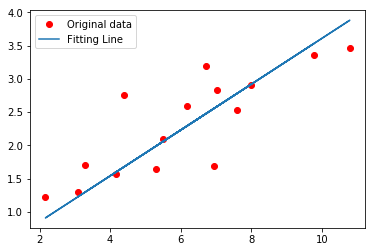

In [3]:
import torch
from torch import nn, optim
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)


x_train = torch.from_numpy(x_train)

y_train = torch.from_numpy(y_train)


# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out


model = LinearRegression()
# 定义loss和优化函数
criterion = nn.MSELoss()
#optimizer = optim.SGD(model.parameters(), lr=1e-4)
optimizer=optim.Adam(model.parameters(),lr=1e-4)

# 开始训练
num_epochs = 10000  #epoch可自定义
for epoch in range(num_epochs):
    inputs = x_train
    target = y_train

    # forward
    out = model(inputs)
    loss = criterion(out, target)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 200 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.item()))

model.eval()
predict = model(x_train)
predict = predict.data.numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')
# 显示图例
plt.legend() 
plt.show()

# 保存模型
torch.save(model.state_dict(), './linear.pth')